In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sc
from mpl_toolkits import mplot3d

Generamos $x$ y $y$ aleatorios entre $[-1,1]$

In [87]:
x = np.random.uniform(-1,1,10000)
y = np.random.uniform(-1,1,10000)

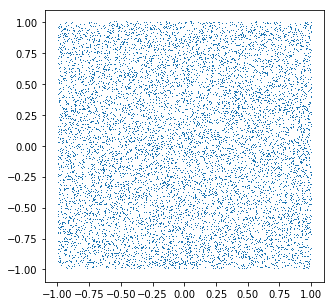

In [88]:
plt.figure(figsize=(5,5))
plt.plot(x,y,',');

Hacemos la transformación tomando sólo:
\begin{equation}
\sqrt{x^2+y^2}<100 
\end{equation}

In [55]:
x_r = np.extract(np.sqrt(x**2+y**2) <= 1,x)
y_r = np.extract(np.sqrt(x**2+y**2) <= 1,y)

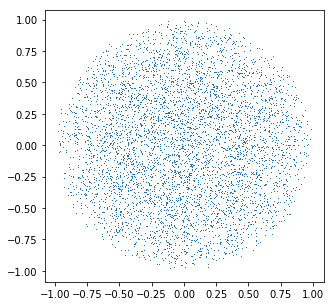

In [85]:
plt.figure(figsize=(5,5))
plt.plot(x_r,y_r,',');

Ahora, generamos $r$ y $\theta$ aleatorios y transformamos a coordenadas cartecianas

In [58]:
r = np.random.uniform(0,1,10000)
theta = np.random.uniform(0,2*np.pi,10000)

In [59]:
x_r_2 = r*np.cos(theta)
y_r_2 = r*np.sin(theta)

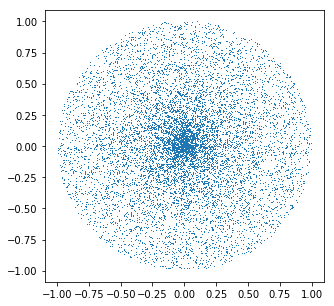

In [60]:
plt.figure(figsize=(5,5))
plt.plot(x_r_2,y_r_2,',');

Para quitar la aglumeración, podemos generar primero $x$ y $y$ y transformarlos a $r$ y $\theta$ 

In [89]:
r_2d =  np.sqrt(x_r**2+y_r**2)
th_2d = np.arctan2(y_r,x_r)

#Volvemos a pasar a coordenadas cartecianas
x_2d = r_2d*np.cos(th_2d)
y_2d = r_2d*np.sin(th_2d)

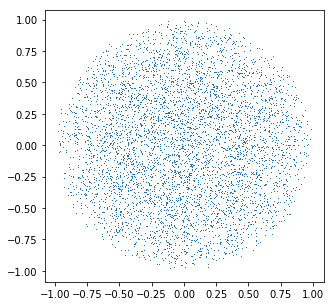

In [90]:
plt.figure(figsize=(5,5))
plt.plot(x_2d,y_2d,',');

Hacemos el mismo proceso para una distribución de puntos aleatoria en 3d

In [91]:
x = np.random.uniform(-1,1,10000)
y = np.random.uniform(-1,1,10000)
z = np.random.uniform(-1,1,10000)

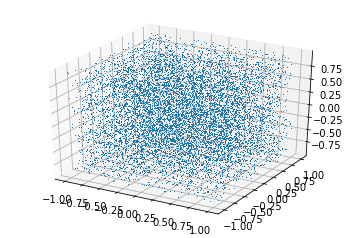

In [92]:
fig = plt.figure()
ax = plt.axes(projection='3d',facecolor='w')
ax.plot3D(x,y,z,',')

In [93]:
x_r = np.extract(np.sqrt(x**2+y**2+z**2) <= 1,x)
y_r = np.extract(np.sqrt(x**2+y**2+z**2) <= 1,y)
z_r = np.extract(np.sqrt(x**2+y**2+z**2) <= 1,z)

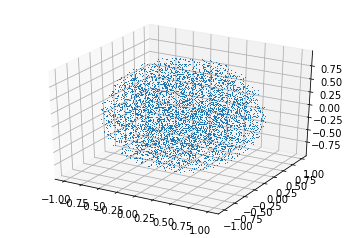

In [94]:
fig = plt.figure()
ax = plt.axes(projection='3d',facecolor='w')
ax.plot3D(x_r,y_r,z_r,',')

In [95]:
r = np.random.uniform(0,1,10000)
theta = np.random.uniform(0,np.pi,10000)
phi = np.random.uniform(0,2*np.pi,10000)

In [96]:
x_3r_2 = r*np.sin(theta)*np.cos(phi)
y_3r_2 = r*np.sin(theta)*np.sin(phi)
z_3r_2 = r*np.cos(theta)

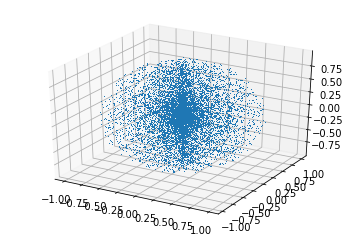

In [97]:
fig = plt.figure()
ax = plt.axes(projection='3d',facecolor='w')
ax.plot3D(x_3r_2,y_3r_2,z_3r_2,',');

In [98]:
rad = np.sqrt(x_r**2 + y_r**2 + z_r**2)
ph = np.arctan2(y_r,x_r)
th = np.arctan2(np.sqrt(x_r**2+y_r**2),z_r)

In [99]:
x_p = rad*np.sin(th)*np.cos(ph)
y_p = rad*np.sin(th)*np.sin(ph)
z_p = rad*np.cos(th)

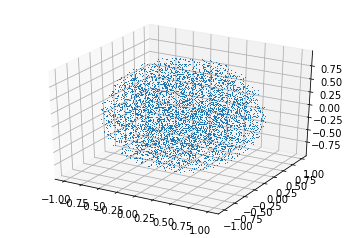

In [100]:
fig = plt.figure()
ax = plt.axes(projection='3d',facecolor='w')
ax.plot3D(x_p,y_p,z_p,',');

# Flux Vs Mag

Hacemos la función de distribución normal:
\begin{equation}
P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
con $\sigma = \frac{5}{8\sqrt{2\pi}}$ y $\mu = 1$

In [16]:
def expo(x,sigm,mu):
    return ((1/(sigm*pow(2*np.pi,0.5)))*np.exp(-(pow((x-mu),2))/(2*pow(sigm,2))))

calculamos el flujo:

In [17]:
sigma = 5/(8*pow(2*np.pi,0.5))
mu = 1
n = 100000
flux = np.random.uniform(0,2,n)
P_flux = expo(flux,sigma,mu)

F = np.random.random(n)
flux_h = (sigma*pow(2,0.5)*sc.special.erfinv(2*F-1)+mu)

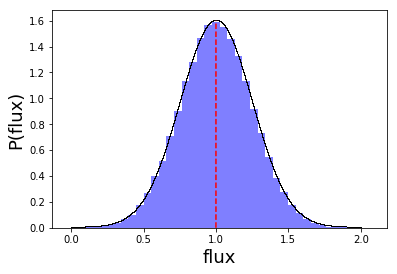

In [18]:
plt.plot(flux,P_flux,'k,')
plt.plot(np.ones_like(flux),np.linspace(0,np.max(P_flux),n),'r--')
plt.hist(flux_h,bins = 40,density=True,color='blue',alpha = 0.5)
plt.xlabel('flux',fontsize  =18)
plt.ylabel('P(flux)',fontsize  =18);

Hacemos la transformación del flujo a magnitud:

\begin{equation}
mag =\Phi(flux)= -2.5 \log_{10}(flux)
\end{equation}

Entonces, para calcular P(mag) tenemos el Jacobiano:

\begin{equation}
\left|  \frac{d \Phi^{-1}(mag) }{d mag} \right| = \left| -\ln(4)e^{-mag\ln{4}} \right|
\end{equation}

con:

\begin{equation}
\Phi^{-1}(mag) = 10^{-\frac{mag}{2.5}}
\end{equation}

In [19]:
mag = -2.5*np.log10(flux)
jacob = np.abs((-np.log1p(10)/2.5)*np.exp(-mag*np.log1p(10)/2.5))
P_mag = expo(flux,sigma,mu)*jacob

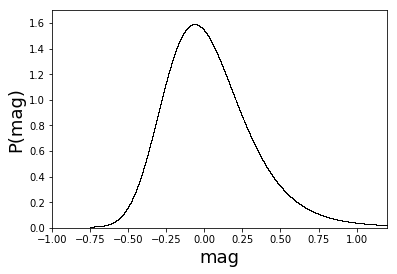

In [20]:
plt.plot(mag,P_mag,'k,')
plt.xlim(-1,1.2)
plt.ylim(0,1.7)
plt.xlabel('mag',fontsize  =18)
plt.ylabel('P(mag)',fontsize  =18);

### Exercise:

If 

\begin{equation}
y = \phi(x) = e^{x} 
\end{equation}
and 
\begin{equation}
p(x)=1 \quad for \quad 0 ≤ x ≤ 1 
\end{equation}

(a uniform distribution). What is the resultant distribution for y.

In [101]:
#Generamos la funcion de distribución
x = np.random.uniform(-1,2,10000)
P_x = np.zeros_like(x)
P_x[(x<= 1.0) & (x >= 0.0)] = 1.0
P_x[(x>1.0) | (x<0.0)] = 0.0

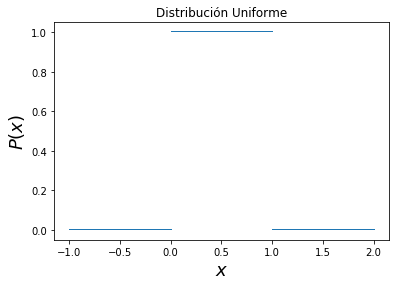

In [22]:
plt.plot(x,P_x,',')
plt.title("Distribución Uniforme")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Tenemos entonces:

\begin{equation}
p(y) = p(\Phi^{-1}(y))\left| \frac{d\Phi^{-1}(y)}{dy} \right|
\end{equation}
con
\begin{equation}
\Phi^{-1}(y) = \ln(y)
\end{equation}
Entonces
\begin{equation}
p(y) = \frac{1}{y}
\end{equation}
para
$1<y<e$

In [102]:
y = np.exp(x)
P_y = np.zeros_like(x)
P_y[(y<= np.e) & (y >= 1.0)] = 1.0/y[(y<= np.e) & (y >= 1.0)]
P_y[(y>np.e) | (y<1.0)] = 0.0

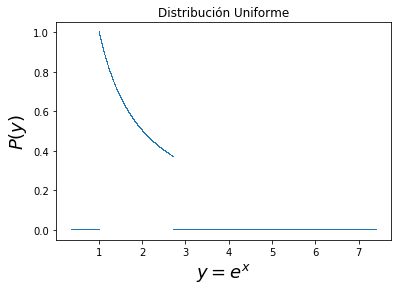

In [103]:
plt.plot(y,P_y,',')
plt.title("Distribución Uniforme")
plt.xlabel("$y = e^{x}$",fontsize  =18) 
plt.ylabel("$P(y)$",fontsize  =18);